In [288]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sys
from numpy import *
from numpy.linalg import *


eps=sys.float_info.epsilon

#--------------EG con pivot---------------

def pivot(a:np.array,i)->int:
    max=abs(a[i,i])
    res=0
    for k in range(i+1,len(a)):
        if(abs(a[k,i])>max):
            max=a[k,i]
            res=k
    return res

def producto_punto(v:np.array,w:np.array)->np.float64:
    res=np.float64(0)
    for i in range(0,v.size):
        res+=v[i]*w[i]
    return res

#Para poder limitar el error numérico y que el algoritmo sea correcto (i.e. devuelva S.I. cuando no hay solucion o alguna si existe) , consideramos que un x<=e-6 es efectivamente 0.Es decir , nos basamos en una precision de 6 digitos en los resultados.

def eliminacion_gaussiana_pivot(m:np.array,b:np.array)->np.array:
    if(len(m)!=len(m[0])):
        print("Error. Matriz no cuadrada")

    cota_decimal=eps*pow(10,6)

    #Construimos A' , extension de A con b
    n=len(m)
    m_ext=np.hstack((m,np.zeros((n,1))))
    m_ext[:,n]=b

    for i in range(0,n):

        fila_a_permutar=pivot(m_ext,i)
        if(fila_a_permutar>i):      #Para el caso que devuelve 0
            copy=np.array(m_ext[i,:])
            m_ext[i,:]=m_ext[fila_a_permutar,:]
            m_ext[fila_a_permutar,:]=copy

        #Si la columna ya es nula,paso.
        if(np.all(m_ext[i:,i] == 0)):
            continue
        
        for j in range(i+1,n):
            if(np.abs(m_ext[i,i])<cota_decimal):
                print("Posible Error Numérico.Cociente con divisor cercano a 0.\n")
            multiplier=m_ext[j,i]/m_ext[i,i]
            m_ext[j,:]=m_ext[j,:]-m_ext[i,:]*multiplier     #M_j=M_j - M_i * multiplier
            
    #print(m_ext)

    #Excepcion a devolver
    for i in range(0,n):
        if(np.abs(m_ext[i,i])>cota_decimal): #M_ii>0        
            continue
        elif(np.abs(m_ext[i,n])>cota_decimal):#    b_ii>0                    
            print("Sistema incompatible.No existen soluciones.")
            return 
        else:               #TODO:que hago si es SCI
            print("Hay infinitas soluciones.")            
            return


    #Ya A' escalonada -> despejamos x
    x=np.zeros(n)
    for i in range(n-1,-1,-1):
        b_i=m_ext[i,n]
        if(i==n-1):
            x[i]=b_i/m_ext[i,i]
            continue
        prod=producto_punto(m_ext[i,i+1:n],x[i+1:n])
        x[i]=(b_i-prod)/m_ext[i,i]

    #Devolvemos X=[x1,...,xn]
    return x




#matrix=np.array([[0,1,1,2],
#                 [2,-1,1,0],
#                 [3,1,0,1],
#                 [0,2,1,3]],dtype=np.float64)
#
#b=np.array([1,2,1,0],dtype=np.float64)

matrix=np.array([[1,3,2],
                 [0,2,4],
                 [2,1,3]],dtype=np.float32)

b=np.array([6,6,6],dtype=np.float32)

# AX0=?b
#print(matrix@eliminacion_gaussiana_pivot(matrix,b,0))

print(eliminacion_gaussiana_pivot(matrix,b))
solve(matrix,b)

[1. 1. 1.]


array([1., 1., 1.], dtype=float32)

Text(0, 0.5, 'Máxima diferencia absoluta para X')

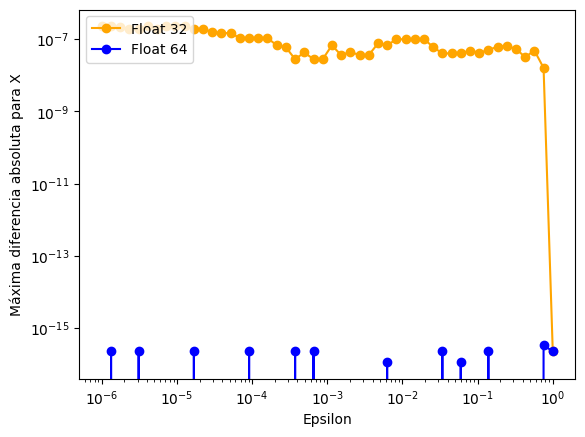

In [289]:
#Exploración de resultados -> la idea es ver como los resultados cambian en base a un sistema de representación numerica con mayor precision.El cual es el caso de DoublePrecisionFP(64 bits)

#Matrices
A_32=np.array([[1,2,3],
              [1,2,3],
              [1,2,3]],dtype=np.float32)

A_64=np.array([[1,2,3],
            [1,2,3],
            [1,2,3]],dtype=np.float64)

#Arrays de TI
b_32=np.array([6,6,6],dtype=np.float32)
b_64=np.array([6,6,6],dtype=np.float64)


#Epsilons a explorar
epsilons_32=np.logspace(0,-6,dtype=np.float32,num=50)
epsilons_64=np.logspace(0,-6,dtype=np.float64,num=50)

#Solucion del sistema
x_32=np.array([1,1,1],dtype=np.float32)
x_64=np.array([1,1,1],dtype=np.float64)

#Array de diferencias absolutas entre X y X'
max_dif_32=np.zeros(epsilons_32.size,dtype=np.float32)
max_dif_64=np.zeros(epsilons_32.size,dtype=np.float64)

for i in range(epsilons_32.size):
    e=epsilons_32[i]

    A_e_64=np.array([[0,e,-e],
                  [-e,0,e],
                  [e,-e,0]],dtype=np.float64)
    
    A_e_32=np.array([[0,e,-e],
                  [-e,0,e],
                  [e,-e,0]],dtype=np.float32)
    
    A_32=A_32+A_e_32
    A_64=A_64+A_e_64

    #print(A_32)

    #Hacemos EG y guardamos el vector X'
    aux_32=eliminacion_gaussiana_pivot(A_32,b_32)
    aux_64=eliminacion_gaussiana_pivot(A_64,b_64)
    

    #Buscamos norma infinito y la guardamos respecto al epsilon
    aux_32=aux_32-x_32  
    aux_64=aux_64-x_64

    aux_32=np.abs(aux_32)
    aux_64=np.abs(aux_64)   #|X'- X|

    max_dif_32[i]=np.max(aux_32)
    max_dif_64[i]=np.max(aux_64)


#Listos los valores ,graficamos los resultados.

plt.plot(epsilons_32,max_dif_32,'-o',label='Float 32',color='orange')
plt.plot(epsilons_32,max_dif_64,'-o',label='Float 64',color='blue')

plt.legend(loc='upper left')


plt.xscale('log')
plt.yscale('log')

plt.xlabel('Epsilon')
plt.ylabel('Máxima diferencia absoluta para X')








In [263]:
#Test precision numerica
np.float64(320000/0.0000245678)
x=eps*pow(10,6)


(0.1+0.2)/x- 0.3/x


np.random.rand(10)

np.zeros(0)



array([], dtype=float64)